In [1]:
from utils import getListOfFiles
import os

all_files = getListOfFiles(os.curdir)
res_path = "predictions_m0.1.tsv"
res_files = list(filter(lambda p: res_path in p, all_files))
print(res_files)

['./8_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './9_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './7_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './6_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './4_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './5_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './1_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './2_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_ab50/predictions_m0.1.tsv', './3_voc/kallisto/benchmarks/benchmarks/ww_C.37vP.1_reference_set/P.1_EPI_ISL_2035339_a

In [2]:
import pandas as pd

resP1 = [0,0,0,0,0,0,0,0,0,0]
resC37 = [0,0,0,0,0,0,0,0,0,0]
resB117 = [0,0,0,0,0,0,0,0,0,0]


for res_file  in res_files:
    #get the number of mutations
    nm = res_file[2]
    if res_file[3] != "_":
        nm+= res_file[3]
    nm = int(nm)
    
    # read tsv
    tsv_file = open(res_file).readlines()[2:]
    tv = 50

    # find the other relevant sequence in the list from indices 2 - 11 and calculate relative prediction error
    for item in tsv_file[1:]:
        lineage = item.split("\t")[0]
        ev = float(item.split("\t")[2])

        difference = round(abs(ev-tv), 3)
        relative_error_nm = round(difference/tv, 3)

        
        if lineage == "P.1":
            resP1[nm] = relative_error_nm
            
        
        if lineage == "C.37":
            resC37[nm] = relative_error_nm
        
        if lineage == "B.1.1.7":
            resB117[nm] = ev

print(resP1)
print(resC37)
print(resB117)


[0, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.019, 0.011]
[0, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.003, 0.009, 0.001]
[0, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 0.29, 1.42, 0.49]


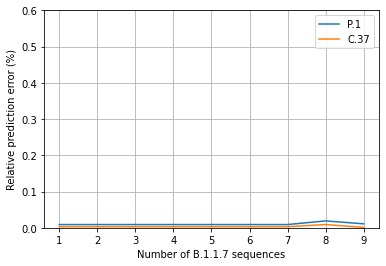

In [3]:
import matplotlib.pyplot as plt
indx = [1,2,3,4,5,6,7,8,9]

plt.grid()
plt.plot(indx, resP1[1:], label = "P.1")
plt.plot(indx, resC37[1:], label = "C.37")
plt.ylabel('Relative prediction error (%)')
plt.xlabel("Number of B.1.1.7 sequences")
plt.ylim(0, 0.6)
plt.legend()
plt.savefig("results/results_0.1_voc_2_exp.pdf")